# Notes
- Last updated 3/29 11pm

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats

In [2]:
# Get counties
top_county_file = "Zillow CSV results/top_counties_Sale_List_Ratio.csv"
top_county_df = pd.read_csv(top_county_file, encoding="latin")
bottom_county_file = "Zillow CSV results/bottom_counties_Sale_List_Ratio.csv"
bottom_county_df = pd.read_csv(bottom_county_file, encoding="latin")

In [3]:
# Clean up counties (Top)

top_county_df['RegionName'] = top_county_df['RegionName'].str.replace(" County", "")
top_county_df['County'] = top_county_df['RegionName'] + ", " + top_county_df['StateName']

top_county_clean = top_county_df[['County']]
top_county_clean = top_county_clean.iloc[::-1].reset_index(drop=True)
top_county_clean

,County
0,"La Porte, IN"
1,"Bannock, ID"
2,"Douglas, KS"
3,"Medina, TX"
4,"Weber, UT"
5,"Bell, TX"
6,"Davis, UT"
7,"Alameda, CA"
8,"Kootenai, ID"
9,"Campbell, WY"


In [4]:
# Clean up counties (Bottom)
bottom_county_df['RegionName'] = bottom_county_df['RegionName'].str.replace(" County", "")
bottom_county_df['County'] = bottom_county_df['RegionName'] + ", " + bottom_county_df['StateName']

bottom_county_clean = bottom_county_df[['County']]
bottom_county_clean

,County
0,"Sullivan, NY"
1,"Garrett, MD"
2,"Saint Lawrence, NY"
3,"Cattaraugus, NY"
4,"Douglas, WI"
5,"Jefferson, NY"
6,"Pike, PA"
7,"Curry, OR"
8,"Luzerne, PA"
9,"Cumberland, TN"


In [5]:
# Get health factor data and clean up
health_factor_path = "raw data/2018_all_county_data_1.csv"
health_factor_df = pd.read_csv(health_factor_path, encoding="latin")

health_factor_df["State"] = health_factor_df["State"].replace({'Alabama' : 'AL', 'Alaska' : 'AK', 'Arizona' : 'AZ', 'Arkansas' : 'AR', 'California' : 'CA', 'Colorado' : 'CO', 'Connecticut' : 'CT', 'Delaware' : 'DE', 'Florida' : 'FL', 'Georgia' : 'GA', 'Hawaii' : 'HI', 'Idaho' : 'ID', 'Illinois' : 'IL', 'Indiana' : 'IN', 'Iowa' : 'IA', 'Kansas' : 'KS', 'Kentucky' : 'KY', 'Louisiana' : 'LA', 'Maine' : 'ME', 'Maryland' : 'MD', 'Massachusetts' : 'MA', 'Michigan' : 'MI', 'Minnesota' : 'MN', 'Mississippi' : 'MS', 'Missouri' : 'MO', 'Montana' : 'MT', 'Nebraska' : 'NE', 'Nevada' : 'NV', 'New Hampshire' : 'NH', 'New Jersey' : 'NJ', 'New Mexico' : 'NM', 'New York' : 'NY', 'North Carolina' : 'NC', 'North Dakota' : 'ND', 'Ohio' : 'OH', 'Oklahoma' : 'OK', 'Oregon' : 'OR', 'Pennsylvania' : 'PA', 'Rhode Island' : 'RI', 'South Carolina' : 'SC', 'South Dakota' : 'SD', 'Tennessee' : 'TN', 'Texas' : 'TX', 'Utah' : 'UT', 'Vermont' : 'VT', 'Virginia' : 'VA', 'Washington' : 'WA', 'West Virginia' : 'WV', 'Wisconsin' : 'WI', 'Wyoming' : 'WY'})
health_factor_df['County'] = health_factor_df["County"] + ", " + health_factor_df["State"]

In [6]:
# Get health factor data 2 and clean up
health_factor_path2 = "raw data/2018_all_county_data_2.csv"
health_factor_df2 = pd.read_csv(health_factor_path2, encoding="latin")

health_factor_df2["State"] = health_factor_df2["State"].replace({'Alabama' : 'AL', 'Alaska' : 'AK', 'Arizona' : 'AZ', 'Arkansas' : 'AR', 'California' : 'CA', 'Colorado' : 'CO', 'Connecticut' : 'CT', 'Delaware' : 'DE', 'Florida' : 'FL', 'Georgia' : 'GA', 'Hawaii' : 'HI', 'Idaho' : 'ID', 'Illinois' : 'IL', 'Indiana' : 'IN', 'Iowa' : 'IA', 'Kansas' : 'KS', 'Kentucky' : 'KY', 'Louisiana' : 'LA', 'Maine' : 'ME', 'Maryland' : 'MD', 'Massachusetts' : 'MA', 'Michigan' : 'MI', 'Minnesota' : 'MN', 'Mississippi' : 'MS', 'Missouri' : 'MO', 'Montana' : 'MT', 'Nebraska' : 'NE', 'Nevada' : 'NV', 'New Hampshire' : 'NH', 'New Jersey' : 'NJ', 'New Mexico' : 'NM', 'New York' : 'NY', 'North Carolina' : 'NC', 'North Dakota' : 'ND', 'Ohio' : 'OH', 'Oklahoma' : 'OK', 'Oregon' : 'OR', 'Pennsylvania' : 'PA', 'Rhode Island' : 'RI', 'South Carolina' : 'SC', 'South Dakota' : 'SD', 'Tennessee' : 'TN', 'Texas' : 'TX', 'Utah' : 'UT', 'Vermont' : 'VT', 'Virginia' : 'VA', 'Washington' : 'WA', 'West Virginia' : 'WV', 'Wisconsin' : 'WI', 'Wyoming' : 'WY'})
health_factor_df2['County'] = health_factor_df2["County"] + ", " + health_factor_df2["State"]

# Percent Diabetic

In [7]:
# Specific health factor 
diabetic = health_factor_df2[["County", "% Diabetic"]]
diabetic.head

<bound method NDFrame.head of                County  % Diabetic
0         Autauga, AL          12
1         Baldwin, AL          11
2         Barbour, AL          18
3            Bibb, AL          15
4          Blount, AL          14
5         Bullock, AL          20
6          Butler, AL          18
7         Calhoun, AL          16
8        Chambers, AL          16
9        Cherokee, AL          13
10        Chilton, AL          14
11        Choctaw, AL          17
12         Clarke, AL          17
13           Clay, AL          14
14       Cleburne, AL          13
15         Coffee, AL          16
16        Colbert, AL          17
17        Conecuh, AL          18
18          Coosa, AL          16
19      Covington, AL          14
20       Crenshaw, AL          15
21        Cullman, AL          16
22           Dale, AL          14
23         Dallas, AL          18
24         DeKalb, AL          12
25         Elmore, AL          13
26       Escambia, AL          19
27         Etowah,

In [8]:
# Make merge for plotting
top_county_data = pd.merge(top_county_clean, diabetic, on='County', how='left')
bottom_county_data = pd.merge(bottom_county_clean, diabetic, on='County', how='left')
bottom_county_data.head


<bound method NDFrame.head of                 County  % Diabetic
0         Sullivan, NY        11.0
1          Garrett, MD        13.0
2   Saint Lawrence, NY         NaN
3      Cattaraugus, NY         9.0
4          Douglas, WI         9.0
5        Jefferson, NY        10.0
6             Pike, PA        12.0
7            Curry, OR        13.0
8          Luzerne, PA        11.0
9       Cumberland, TN        16.0
10           Salem, NJ        12.0
11          Putnam, FL        13.0
12         Jackson, NC        11.0
13          Monroe, GA        14.0
14           Henry, IL        11.0
15         Venango, PA        13.0
16         Haywood, NC        12.0
17         Robeson, NC        16.0
18      Schuylkill, PA        12.0
19          Warren, TN        17.0>

In [9]:
# Get p-value
pop1 = top_county_data['% Diabetic']
pop2 = bottom_county_data["% Diabetic"]
pop1.fillna(0, inplace=True)
pop2.fillna(0, inplace=True)
stats.ttest_ind(pop1, pop2, equal_var=False)

Ttest_indResult(statistic=-3.815428331013234, pvalue=0.0005632053336786925)

Text(0.5, 1.0, 'Percent Diabetic in Top 20 and Bottom 20 Counties')

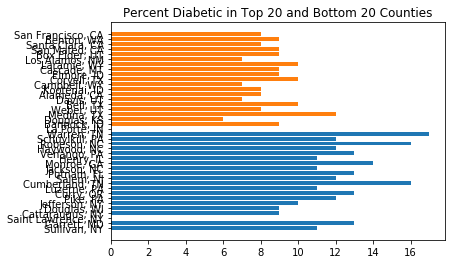

In [10]:
# Plot
plt.barh(bottom_county_data['County'], bottom_county_data['% Diabetic'])

plt.barh(top_county_data['County'], top_county_data['% Diabetic'])
#plt.text(20, 15, "Note:\pvalue=0.0005632053336786925")
plt.title("Percent Diabetic in Top 20 and Bottom 20 Counties")



In [11]:
#plt.savefig("Plot1.png")

# Percent Uninsured

In [12]:
# Specific health factor 
uninsured_rate = health_factor_df[["County", "% Uninsured"]]
uninsured_rate.head()

,County,% Uninsured
0,"Autauga, AL",9.0
1,"Baldwin, AL",12.0
2,"Barbour, AL",13.0
3,"Bibb, AL",12.0
4,"Blount, AL",14.0


In [13]:
# Make merge for plotting

top_county_data = pd.merge(top_county_clean, uninsured_rate, on='County', how='left')
bottom_county_data = pd.merge(bottom_county_clean, uninsured_rate, on='County', how='left')
bottom_county_data.head()

,County,% Uninsured
0,"Sullivan, NY",9.0
1,"Garrett, MD",8.0
2,"Saint Lawrence, NY",NaN
3,"Cattaraugus, NY",8.0
4,"Douglas, WI",7.0


In [14]:
# Get p-value
pop1 = top_county_data['% Uninsured']
pop2= bottom_county_data["% Uninsured"]
pop1.fillna(0, inplace=True)
pop2.fillna(0, inplace=True)
stats.ttest_ind(pop1, pop2, equal_var=False)

Ttest_indResult(statistic=-0.5928481998205519, pvalue=0.5568656222318268)

Text(0.5, 1.0, 'Percent Uninsured in Top 20 and Bottom 20 Counties')

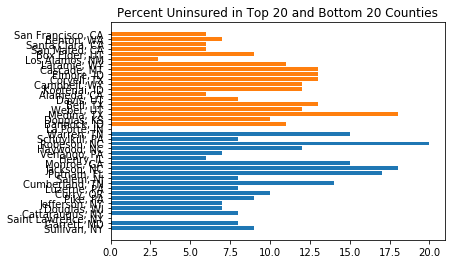

In [15]:
# Plot
plt.barh(bottom_county_data['County'], bottom_county_data['% Uninsured'])

plt.barh(top_county_data['County'], top_county_data['% Uninsured'])
plt.title("Percent Uninsured in Top 20 and Bottom 20 Counties")

In [16]:
# Make plot prettier

In [17]:
# Export plot

# PCP Rate
primary care physician per 100,000 population

In [18]:
# Get specific health factor data

PCP_rate_df = health_factor_df[["County", "PCP Rate"]]
PCP_rate_df.head()

,County,PCP Rate
0,"Autauga, AL",45.0
1,"Baldwin, AL",73.0
2,"Barbour, AL",42.0
3,"Bibb, AL",53.0
4,"Blount, AL",21.0


In [19]:
# Make merge for plotting
top_county_data = pd.merge(top_county_clean, PCP_rate_df, on='County', how='left')
bottom_county_data = pd.merge(bottom_county_clean, PCP_rate_df, on='County', how='left')
bottom_county_data.head()

,County,PCP Rate
0,"Sullivan, NY",39.0
1,"Garrett, MD",54.0
2,"Saint Lawrence, NY",NaN
3,"Cattaraugus, NY",49.0
4,"Douglas, WI",18.0


In [20]:
# Get p-value
pop1 = top_county_data['PCP Rate']
pop2= bottom_county_data['PCP Rate']
pop1.fillna(0,inplace=True)
pop2.fillna(0,inplace=True)
stats.ttest_ind(pop1, pop2, equal_var=False)

Ttest_indResult(statistic=2.115953350622017, pvalue=0.04319966348185023)

Text(0.5, 1.0, 'Primary Care Physician in Top 20 and Bottom 20 Counties')

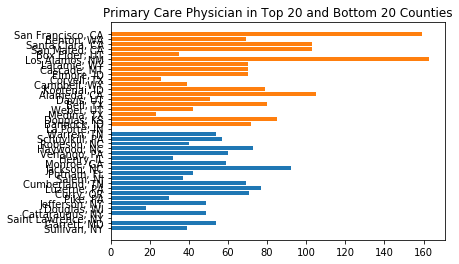

In [21]:
# Plot
plt.barh(bottom_county_data['County'], bottom_county_data['PCP Rate'])

plt.barh(top_county_data['County'], top_county_data['PCP Rate'])
plt.title("Primary Care Physician in Top 20 and Bottom 20 Counties")

In [22]:
# Make plot prettier

In [23]:
# Export plot

# Dentist Rate
dentist per 100,000 population

In [24]:
# Get specific health factor data

dentist_rate_df = health_factor_df[["County", "Dentist Rate"]]
dentist_rate_df.head()

,County,Dentist Rate
0,"Autauga, AL",32.0
1,"Baldwin, AL",49.0
2,"Barbour, AL",35.0
3,"Bibb, AL",22.0
4,"Blount, AL",19.0


In [25]:
# Make merge for plotting

top_county_data = pd.merge(top_county_clean, dentist_rate_df, on='County', how='left')
bottom_county_data = pd.merge(bottom_county_clean, dentist_rate_df, on='County', how='left')
bottom_county_data.head()

,County,Dentist Rate
0,"Sullivan, NY",39.0
1,"Garrett, MD",41.0
2,"Saint Lawrence, NY",NaN
3,"Cattaraugus, NY",41.0
4,"Douglas, WI",51.0


In [26]:
# Get p-value
pop1 = top_county_data['Dentist Rate']
pop2= bottom_county_data['Dentist Rate']
pop1.fillna(0,inplace=True)
pop2.fillna(0,inplace=True)
stats.ttest_ind(pop1, pop2, equal_var=False)


Ttest_indResult(statistic=3.8032302366390116, pvalue=0.0006336435614525858)

Text(0.5, 1.0, 'Dentist Rate in Top 20 and Bottom 20 Counties')

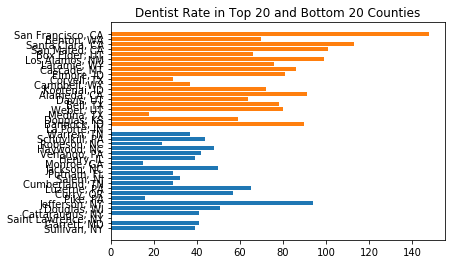

In [27]:
# Plot

plt.barh(bottom_county_data['County'], bottom_county_data['Dentist Rate'])

plt.barh(top_county_data['County'], top_county_data['Dentist Rate'])
plt.title("Dentist Rate in Top 20 and Bottom 20 Counties")

In [28]:
# Make plot prettier

In [29]:
# Export plot

# MHP Rate
mental health provider per 100,000 population

In [30]:
# Get specific health factor data

MHP_rate = health_factor_df[["County", "MHP Rate"]]
MHP_rate.head()

,County,MHP Rate
0,"Autauga, AL",13.0
1,"Baldwin, AL",89.0
2,"Barbour, AL",8.0
3,"Bibb, AL",9.0
4,"Blount, AL",9.0


In [31]:
# Make merge for plotting

top_county_data = pd.merge(top_county_clean, MHP_rate, on='County', how='left')
bottom_county_data = pd.merge(bottom_county_clean, MHP_rate, on='County', how='left')
bottom_county_data.head()

,County,MHP Rate
0,"Sullivan, NY",183.0
1,"Garrett, MD",116.0
2,"Saint Lawrence, NY",NaN
3,"Cattaraugus, NY",111.0
4,"Douglas, WI",113.0


In [32]:
# Get p-value
pop1 = top_county_data['MHP Rate']
pop2= bottom_county_data['MHP Rate']
pop1.fillna(0,inplace=True)
pop2.fillna(0,inplace=True)
stats.ttest_ind(pop1, pop2, equal_var=False)

Ttest_indResult(statistic=2.4941909993244114, pvalue=0.01799493848011195)

Text(0.5, 1.0, 'Mental Health Provider in Top 20 and Bottom 20 Counties')

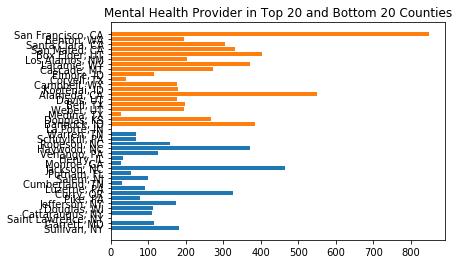

In [33]:
# Plot

plt.barh(bottom_county_data['County'], bottom_county_data['MHP Rate'])

plt.barh(top_county_data['County'], top_county_data['MHP Rate'])
plt.title("Mental Health Provider in Top 20 and Bottom 20 Counties")

In [34]:
# Make plot prettier

In [35]:
# Export plot

# Percent Smokers

In [36]:
# Get specific health factor data

smokers = health_factor_df[["County", "% Smokers"]]
smokers.head()

,County,% Smokers
0,"Autauga, AL",19
1,"Baldwin, AL",17
2,"Barbour, AL",22
3,"Bibb, AL",20
4,"Blount, AL",20


In [37]:
# Make merge for plotting

top_county_data = pd.merge(top_county_clean, smokers, on='County', how='left')
bottom_county_data = pd.merge(bottom_county_clean, smokers, on='County', how='left')
bottom_county_data.head()

,County,% Smokers
0,"Sullivan, NY",18.0
1,"Garrett, MD",16.0
2,"Saint Lawrence, NY",NaN
3,"Cattaraugus, NY",23.0
4,"Douglas, WI",17.0


In [38]:
# Get p-value
pop1 = top_county_data['% Smokers']
pop2= bottom_county_data['% Smokers']
pop1.fillna(0,inplace=True)
pop2.fillna(0,inplace=True)
stats.ttest_ind(pop1, pop2, equal_var=False)

Ttest_indResult(statistic=-3.2231093574117535, pvalue=0.0026246325824130718)

Text(0.5, 1.0, 'Percent Smokers in Top 20 and Bottom 20 Counties')

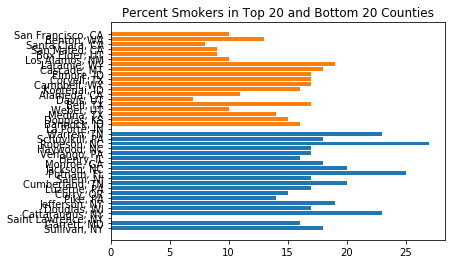

In [39]:
# Plot

plt.barh(bottom_county_data['County'], bottom_county_data['% Smokers'])

plt.barh(top_county_data['County'], top_county_data['% Smokers'])
plt.title("Percent Smokers in Top 20 and Bottom 20 Counties")


In [40]:
# Make plot prettier

In [41]:
# Export plot

# Adult Obesity
- Percentage of adults that report BMI >= 30

In [42]:
# Get specific health factor data

obese = health_factor_df[["County", "% Obese"]]
obese.head()

,County,% Obese
0,"Autauga, AL",36
1,"Baldwin, AL",29
2,"Barbour, AL",44
3,"Bibb, AL",38
4,"Blount, AL",36


In [43]:
# Make merge for plotting

top_county_data = pd.merge(top_county_clean, obese, on='County', how='left')
bottom_county_data = pd.merge(bottom_county_clean, obese, on='County', how='left')
bottom_county_data.head()

,County,% Obese
0,"Sullivan, NY",30.0
1,"Garrett, MD",31.0
2,"Saint Lawrence, NY",NaN
3,"Cattaraugus, NY",28.0
4,"Douglas, WI",32.0


In [44]:
# Get p-value
pop1 = top_county_data['% Obese']
pop2= bottom_county_data['% Obese']
pop1.fillna(0,inplace=True)
pop2.fillna(0,inplace=True)
stats.ttest_ind(pop1, pop2, equal_var=False)

Ttest_indResult(statistic=-2.0625813323243434, pvalue=0.04603625316033677)

Text(0.5, 1.0, 'Percent Obese in Top 20 and Bottom 20 Counties')

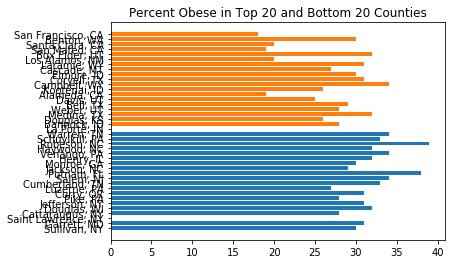

In [45]:
# Plot

plt.barh(bottom_county_data['County'], bottom_county_data['% Obese'])

plt.barh(top_county_data['County'], top_county_data['% Obese'])
plt.title("Percent Obese in Top 20 and Bottom 20 Counties")

In [46]:
# Make plot prettier

In [47]:
# Export plot

# Teen Birth Rate
- Births per 1,000 females ages 15-19

In [48]:
# Get specific health factor data

teen_birth = health_factor_df[["County", "Teen Birth Rate"]]
teen_birth.head()

,County,Teen Birth Rate
0,"Autauga, AL",28.0
1,"Baldwin, AL",32.0
2,"Barbour, AL",50.0
3,"Bibb, AL",47.0
4,"Blount, AL",40.0


In [49]:
# Make merge for plotting

top_county_data = pd.merge(top_county_clean, teen_birth, on='County', how='left')
bottom_county_data = pd.merge(bottom_county_clean, teen_birth, on='County', how='left')
bottom_county_data.head()

,County,Teen Birth Rate
0,"Sullivan, NY",23.0
1,"Garrett, MD",30.0
2,"Saint Lawrence, NY",NaN
3,"Cattaraugus, NY",28.0
4,"Douglas, WI",22.0


In [50]:
# Get p-value
pop1 = top_county_data['Teen Birth Rate']
pop2= bottom_county_data['Teen Birth Rate']
pop1.fillna(0,inplace=True)
pop2.fillna(0,inplace=True)
stats.ttest_ind(pop1, pop2, equal_var=False)


Ttest_indResult(statistic=-1.2408746451364336, pvalue=0.22226438497186501)

Text(0.5, 1.0, 'Teen Birth Rate in Top 20 and Bottom 20 Counties')

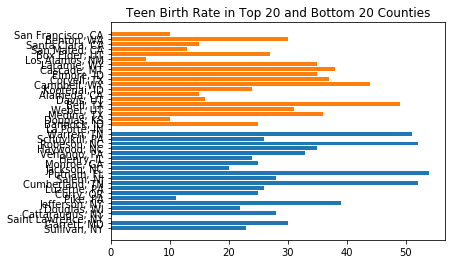

In [51]:
# Plot

plt.barh(bottom_county_data['County'], bottom_county_data['Teen Birth Rate'])

plt.barh(top_county_data['County'], top_county_data['Teen Birth Rate'])
plt.title("Teen Birth Rate in Top 20 and Bottom 20 Counties")

In [52]:
# Make plot prettier

In [53]:
# Export plot

# Percent Low Birth Weight
- Percentage of births with low birth weight (<2500g)

In [54]:
# Get specific health factor data

LBW = health_factor_df[["County", "% LBW"]]
LBW.head()

,County,% LBW
0,"Autauga, AL",9.0
1,"Baldwin, AL",8.0
2,"Barbour, AL",12.0
3,"Bibb, AL",11.0
4,"Blount, AL",8.0


In [55]:
# Make merge for plotting

top_county_data = pd.merge(top_county_clean, LBW, on='County', how='left')
bottom_county_data = pd.merge(bottom_county_clean, LBW, on='County', how='left')
bottom_county_data.head()

,County,% LBW
0,"Sullivan, NY",9.0
1,"Garrett, MD",8.0
2,"Saint Lawrence, NY",NaN
3,"Cattaraugus, NY",8.0
4,"Douglas, WI",6.0


In [56]:
# Get p-value
pop1 = top_county_data['% LBW']
pop2= bottom_county_data['% LBW']
pop1.fillna(0,inplace=True)
pop2.fillna(0,inplace=True)
stats.ttest_ind(pop1, pop2, equal_var=False)

Ttest_indResult(statistic=-1.132862440328535, pvalue=0.2646897132876361)

Text(0.5, 1.0, 'Percent Low Birth Rate in Top 20 and Bottom 20 Counties')

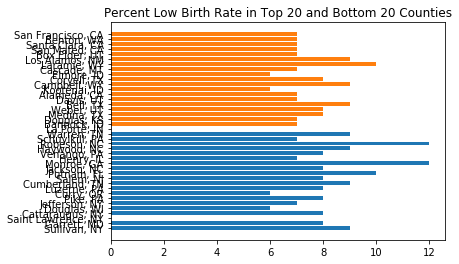

In [57]:
# Plot

plt.barh(bottom_county_data['County'], bottom_county_data['% LBW'])

plt.barh(top_county_data['County'], top_county_data['% LBW'])
plt.title("Percent Low Birth Rate in Top 20 and Bottom 20 Counties")

In [58]:
# Make plot prettier

In [59]:
# Export plot